In [1]:
'''
task 1 
try to find key link between app users
'''

'\ntask 1 \ntry to find key link between app users\n'

In [2]:
import sys
from random import randint
!{sys.executable} -m pip install names
import names

In [3]:
def gen_users_list(users_amount: int)->list[dict]:
    '''
    func generate users
    '''
    users = []
    for i in range(0,users_amount):
        users.append({'id':i, 'name':names.get_first_name()})
    return users

In [4]:
def gen_users_relations(links_amount: int, users_amount: int)->list[list[int]]:
    '''
    links: amount of relations between users
    users_amount: amount of users for links generation
    func generation users relations
    '''
    relations = []
    for i in range(0, links_amount):
        relation_pair = randint(0,links_amount-1)
        while relation_pair == i:
            relation_pair = randint(0,links_amount-1)
        relations.append((i, relation_pair))
    return relations

In [5]:
users_amount = 50
links_amount = 50

# get all users data set
users = gen_users_list(users_amount=users_amount)

# get all users relations data set
relations = gen_users_relations(links_amount=links_amount, users_amount=users_amount)

users
relations

[(0, 1),
 (1, 8),
 (2, 43),
 (3, 11),
 (4, 9),
 (5, 43),
 (6, 10),
 (7, 18),
 (8, 4),
 (9, 34),
 (10, 23),
 (11, 20),
 (12, 22),
 (13, 28),
 (14, 41),
 (15, 44),
 (16, 26),
 (17, 9),
 (18, 38),
 (19, 34),
 (20, 11),
 (21, 4),
 (22, 4),
 (23, 46),
 (24, 1),
 (25, 3),
 (26, 10),
 (27, 39),
 (28, 36),
 (29, 26),
 (30, 34),
 (31, 8),
 (32, 26),
 (33, 31),
 (34, 46),
 (35, 44),
 (36, 16),
 (37, 40),
 (38, 16),
 (39, 14),
 (40, 35),
 (41, 49),
 (42, 36),
 (43, 12),
 (44, 42),
 (45, 21),
 (46, 3),
 (47, 35),
 (48, 4),
 (49, 26)]

In [6]:
friendships = {user['id']: [] for user in users}

In [7]:
'''
create dict with id as key and list of id as a list of friends
'''
for i, j in relations:
    friendships[i].append(j)
    friendships[j].append(i)

In [8]:
def number_of_friends(user: int):
    '''
    get number of friends of one user
    '''
    friends_number = len(friendships[user])
    return friends_number

In [9]:
number_of_friends(2)

1

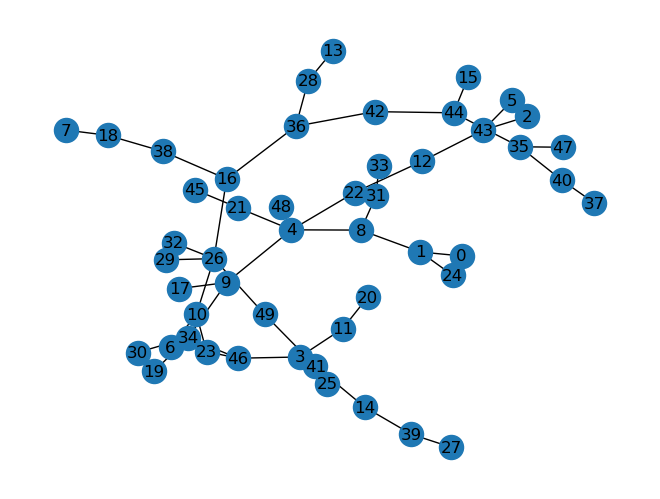

In [11]:
import networkx as nx
G = nx.Graph()

for i, j in relations:
    G.add_edge(i, j)

nx.draw(G, with_labels=True)


In [12]:
users

[{'id': 0, 'name': 'Donna'},
 {'id': 1, 'name': 'Bryan'},
 {'id': 2, 'name': 'Jenny'},
 {'id': 3, 'name': 'Doris'},
 {'id': 4, 'name': 'Mary'},
 {'id': 5, 'name': 'Michael'},
 {'id': 6, 'name': 'Sandra'},
 {'id': 7, 'name': 'Angela'},
 {'id': 8, 'name': 'Jimmy'},
 {'id': 9, 'name': 'John'},
 {'id': 10, 'name': 'Madeline'},
 {'id': 11, 'name': 'Richard'},
 {'id': 12, 'name': 'Charlotte'},
 {'id': 13, 'name': 'Paul'},
 {'id': 14, 'name': 'Jessica'},
 {'id': 15, 'name': 'Lori'},
 {'id': 16, 'name': 'Stanley'},
 {'id': 17, 'name': 'Marsha'},
 {'id': 18, 'name': 'Joshua'},
 {'id': 19, 'name': 'Paul'},
 {'id': 20, 'name': 'Rodolfo'},
 {'id': 21, 'name': 'Eric'},
 {'id': 22, 'name': 'Donald'},
 {'id': 23, 'name': 'Steven'},
 {'id': 24, 'name': 'Laverne'},
 {'id': 25, 'name': 'Brian'},
 {'id': 26, 'name': 'Juanita'},
 {'id': 27, 'name': 'Russell'},
 {'id': 28, 'name': 'June'},
 {'id': 29, 'name': 'Brandi'},
 {'id': 30, 'name': 'Edgar'},
 {'id': 31, 'name': 'Travis'},
 {'id': 32, 'name': 'Dougl

In [13]:
users_dict = {user['id']: user['name'] for user in users}

In [14]:
users_dict

{0: 'Donna',
 1: 'Bryan',
 2: 'Jenny',
 3: 'Doris',
 4: 'Mary',
 5: 'Michael',
 6: 'Sandra',
 7: 'Angela',
 8: 'Jimmy',
 9: 'John',
 10: 'Madeline',
 11: 'Richard',
 12: 'Charlotte',
 13: 'Paul',
 14: 'Jessica',
 15: 'Lori',
 16: 'Stanley',
 17: 'Marsha',
 18: 'Joshua',
 19: 'Paul',
 20: 'Rodolfo',
 21: 'Eric',
 22: 'Donald',
 23: 'Steven',
 24: 'Laverne',
 25: 'Brian',
 26: 'Juanita',
 27: 'Russell',
 28: 'June',
 29: 'Brandi',
 30: 'Edgar',
 31: 'Travis',
 32: 'Douglas',
 33: 'Joel',
 34: 'Oscar',
 35: 'Floyd',
 36: 'Joseph',
 37: 'James',
 38: 'Marian',
 39: 'Chad',
 40: 'Marylin',
 41: 'Marion',
 42: 'Jesus',
 43: 'David',
 44: 'Trinidad',
 45: 'Bessie',
 46: 'Sheila',
 47: 'Elizabeth',
 48: 'Lucy',
 49: 'Ray'}

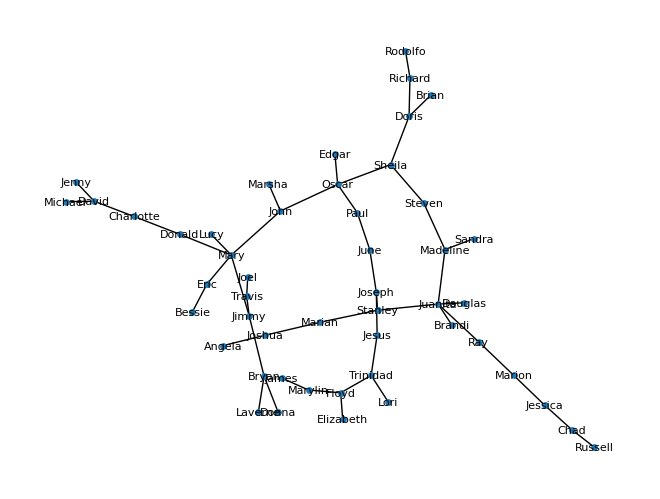

In [33]:
G_named = nx.Graph()

for i, j in relations:
    G_named.add_edge(users_dict[i], users_dict[j])

nx.draw(G_named, with_labels=True, node_size=15, font_size = 8)